In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
ds = pd.read_csv('survey.csv')
ds.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# Questions:

# From male and female, which gender has more mental health problems?
# If you have a mental ilness, it is better to discuss it with co-workers or supervisors?
# How many people are receiving treatment and are mental ill?  (double false condition)
# How many people have a family history of mental illness and are ill?
# How many people feel that a mental health condition might interfer with work?
# What is the country with more people with mental health conditions? 
# Is there any correlation on working remotely and mental illness? 


In [4]:
# Size of the dataset
ds.size

33993

In [5]:
# Getting the shape of dataset (nr of rows and columns)
ds.shape

(1259, 27)

In [6]:
# Understanding descriptive statistics of the dataset
ds.describe(include = 'all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 15:55:07,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Getting the column names for further reference
ds.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [8]:
# How many people are receiving treatment and are mental ill?  (double false condition)

In [9]:
# Filtering data columns by treatment and mental health consequece and sorting values
ds2 = ds[['treatment', 'mental_health_consequence']]
ds2.sort_values(by = ['treatment', 'mental_health_consequence']).head()

,treatment,mental_health_consequence
1,No,Maybe
26,No,Maybe
37,No,Maybe
52,No,Maybe
53,No,Maybe


In [10]:
# Filtering  data by treatment = No and health consequence = No (healthy people)
ds2[(ds2['treatment'] == 'No') & (ds2['mental_health_consequence'] == 'No')].count()


treatment                    280
mental_health_consequence    280
dtype: int64

In [11]:
'''
According to the filter applied, there are 280 people that have received no treatment 
and have no mental health consequences.
I am assuming these are the people that are mentally healthy.
'''

'\nAccording to the filter applied, there are 280 people that have received no treatment \nand have no mental health consequences.\nI am assuming these are the people that are mentally healthy.\n'

In [12]:
# Looking at some columns data to see what kind of answers we have
ds['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [13]:
ds['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
ds['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [15]:
''' From male and female, which gender has more mental health problems? 
I have decided to not consider any answer that is either Female or Male, because people might have not been serious
when taking this survey.
To do this, I will group the data by mental_health_consequence and gender columns, but I will have to 
fix the data in gender column by dropping some of the uniques. '''

ds_gender = ds[['Gender', 'mental_health_consequence']]
male = ds_gender[(ds_gender['Gender'] == 'Male') & (ds['mental_health_consequence'] == 'Yes')]
male.count()

Gender                       130
mental_health_consequence    130
dtype: int64

In [16]:
female = ds_gender[(ds_gender['Gender'] == 'Female') & (ds['mental_health_consequence'] == 'Yes')]
female.count()

Gender                       28
mental_health_consequence    28
dtype: int64

In [17]:
# Converting all 'Yes' answers in to 1 and 'No' answers to 0 values in the mental_health_consequence column
# Removing answers that are not Female or Male in Gender column

ds['mental_health_consequence'] = ds['mental_health_consequence'].replace({'Yes': 1, 'No': 0, 'Maybe': 'Maybe'})
ds['Gender'] = ds['Gender'].replace({
    'male':'Male',
    'female':'Female',
    'm': 'Male', 
    'M': 'Male', 
    'F': 'Female', 
    'f': 'Female',
    'Male-ish':'Male',
    'femail':'Female',
    'Malr':'Male',
    'Man':'Male',
    'ostensibly male, unsure what that really means': 'Male'
})


In [18]:
ds_mental_gender = ds[['Gender', 'mental_health_consequence']]
ds_mental_gender

,Gender,mental_health_consequence
0,Female,0
1,Male,Maybe
2,Male,0
3,Male,1
4,Male,0
...,...,...
1254,Male,0
1255,Male,0
1256,Male,1
1257,Female,1


In [19]:
# Creating a drop lists to remove rows of the Gender and Mental health consequence columns that are not relevant
indexNames = ds_mental_gender[
    (ds_mental_gender['mental_health_consequence'] == 'Maybe')].index

In [20]:
ds_mental_gender.drop(indexNames, inplace = True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
indexNames2 = ds_mental_gender[(ds_mental_gender['Gender'] != 'Female') & (ds_mental_gender['Gender'] != 'Male')].index


In [22]:
ds_mental_gender.drop(indexNames2, inplace = True)

In [23]:
ds_mental_gender.head()

,Gender,mental_health_consequence
0,Female,0
2,Male,0
3,Male,1
4,Male,0
5,Male,0


In [24]:
freq_mental = ds_mental_gender['Gender'].value_counts()
freq_mental.head()

Male      621
Female    135
Name: Gender, dtype: int64

In [25]:
# histogram graph showing distribution of male and female genders and mental health illness
sns.distplot(freq_mental)

NameError: name 'sns' is not defined

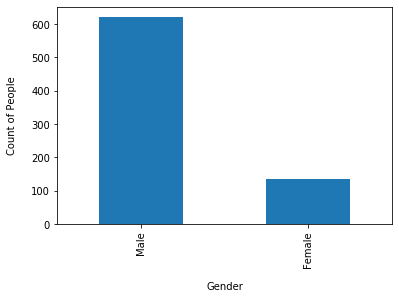

In [26]:
# Plotting mental ill people by Gender
freq_mental.plot.bar()
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.show()

In [27]:
# If you have a mental ilness, it is better to discuss it with co-workers or supervisors?
ds3 = ds[['mental_health_consequence', 'coworkers', 'supervisor']]
ds3

,mental_health_consequence,coworkers,supervisor
0,0,Some of them,Yes
1,Maybe,No,No
2,0,Yes,Yes
3,1,Some of them,No
4,0,Some of them,Yes
...,...,...,...
1254,0,Some of them,Some of them
1255,0,Some of them,Yes
1256,1,No,No
1257,1,No,No


In [28]:
# People that prefer to talk to coworkers rathen than superviors if they a mental considiton
ds4 = ds3[(ds3['mental_health_consequence'] == 1) & (ds3['coworkers'] == 'Yes') & (ds['supervisor'] == 'No')]
ds4.count()

mental_health_consequence    2
coworkers                    2
supervisor                   2
dtype: int64

In [29]:
# # People that prefer to talk to supervisors rathen than cokworkers if they a mental considiton
ds5 = ds3[(ds3['mental_health_consequence'] == 1) & (ds3['coworkers'] == 'No') & (ds['supervisor'] == 'Yes')]
ds5

,mental_health_consequence,coworkers,supervisor
127,1,No,Yes
1118,1,No,Yes


In [30]:
ds5.count()

mental_health_consequence    2
coworkers                    2
supervisor                   2
dtype: int64

In [31]:
ds6 = pd.concat([ds4, ds5])
ds6

,mental_health_consequence,coworkers,supervisor
729,1,Yes,No
962,1,Yes,No
127,1,No,Yes
1118,1,No,Yes


In [267]:
# How many people are receiving treatment and are mental ill?  (double false condition)


In [268]:
ds7 = ds[['mental_health_consequence', 'treatment']]
ds7

,mental_health_consequence,treatment
0,0,Yes
1,Maybe,No
2,0,No
3,1,Yes
4,0,No
...,...,...
1254,0,Yes
1255,0,Yes
1256,1,Yes
1257,1,No


In [269]:
ds8 = ds7[(ds7['mental_health_consequence'] == 1) & (ds7['treatment'] == 'Yes')]
ds8

,mental_health_consequence,treatment
3,1,Yes
12,1,Yes
25,1,Yes
59,1,Yes
60,1,Yes
...,...,...
1238,1,Yes
1247,1,Yes
1248,1,Yes
1252,1,Yes


In [270]:
ds8.count()
# 174 people are receiving treatment and are mentally ill

mental_health_consequence    174
treatment                    174
dtype: int64

In [271]:
# How many people have a family history of mental illness and are ill?
ds9 = ds[['family_history', 'mental_health_consequence']]
ds9


,family_history,mental_health_consequence
0,No,0
1,No,Maybe
2,No,0
3,Yes,1
4,No,0
...,...,...
1254,No,0
1255,Yes,0
1256,Yes,1
1257,No,1


In [272]:
ds10 = ds9[(ds9['mental_health_consequence'] == 1) & (ds9['family_history'] == 'Yes')]
ds10

,family_history,mental_health_consequence
3,Yes,1
12,Yes,1
25,Yes,1
31,Yes,1
59,Yes,1
...,...,...
1228,Yes,1
1238,Yes,1
1248,Yes,1
1252,Yes,1


In [273]:
ds10.count()
# 134 people that have a mental illness, have a family history background of the same medical condition.

family_history               134
mental_health_consequence    134
dtype: int64

In [34]:
# How many people feel that a mental health condition might interfer with work?
# To answer to this question, an assumption that people who have answered yes, have a mental condition.


In [33]:
ds11 = ds.pivot_table(index=["work_interfere"], values = ["mental_health_consequence"], 
                      aggfunc={'mental_health_consequence' : 'count'})
ds11

,mental_health_consequence
work_interfere,
Never,213
Often,144
Rarely,173
Sometimes,465


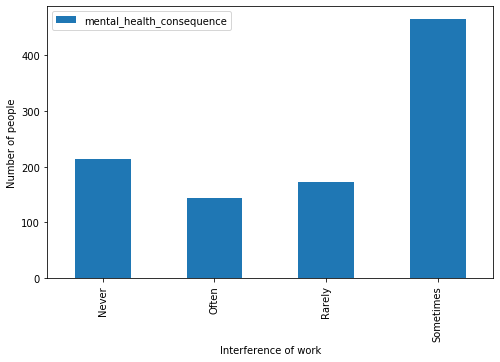

In [45]:
ds11.plot.bar(figsize = (8, 5))
plt.ylabel('Number of people')
plt.xlabel('Interference of work')
plt.show()

In [46]:
# What is the country with more people with mental health conditions? 


In [276]:
ds12 = ds.pivot_table(index=["Country"], values = ["mental_health_consequence"], 
                      aggfunc={'mental_health_consequence' : 'count'})
ds12

,mental_health_consequence
Country,
Australia,21
Austria,3
"Bahamas, The",1
Belgium,6
Bosnia and Herzegovina,1
Brazil,6
Bulgaria,4
Canada,72
China,1


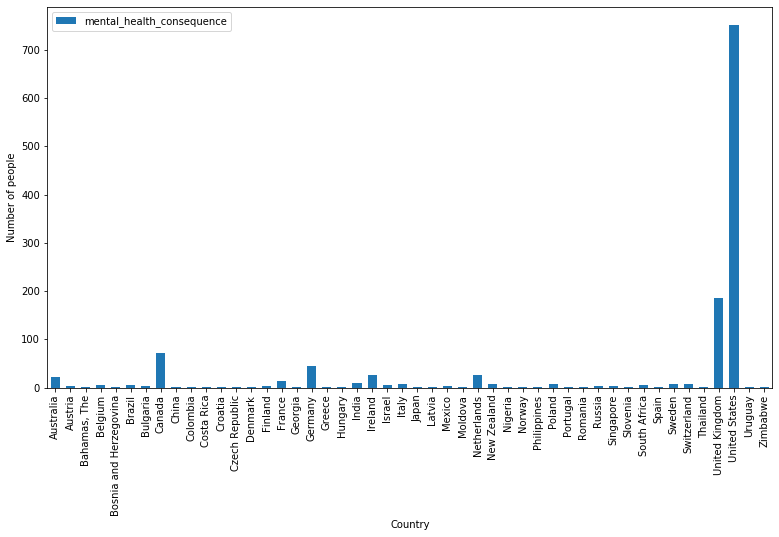

In [277]:
ds12.plot.bar(width=0.6, figsize=(13,7), align='center')
plt.ylabel('Number of people')
plt.show()


In [278]:
ds

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,0,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,0,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,1,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,0,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,0,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,0,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,1,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,1,No,No,No,No,No,No,No,NaN


In [279]:
ds13 = ds[['remote_work', 'mental_health_consequence']]
ds13

,remote_work,mental_health_consequence
0,No,0
1,No,Maybe
2,No,0
3,No,1
4,Yes,0
...,...,...
1254,No,0
1255,Yes,0
1256,No,1
1257,Yes,1


In [280]:
# Creating a list of dropped rows for the dataset 13
ds_drop = ds13.loc[ds13['mental_health_consequence'] == 'Maybe']

In [281]:
ds14 = ds13.drop(ds_drop.index, axis=0)
ds14

,remote_work,mental_health_consequence
0,No,0
2,No,0
3,No,1
4,Yes,0
5,No,0
...,...,...
1252,Yes,1
1254,No,0
1255,Yes,0
1256,No,1


In [291]:
ds14['remote_work'] = ds14['remote_work'].replace({'Yes': 1, 'No': 0})

In [297]:
ds14.dtypes

remote_work                   int64
mental_health_consequence    object
dtype: object

In [304]:
# Changing the type of mental health column to int to match remote work type
ds15 = ds14.astype({'mental_health_consequence': 'int64'})

In [305]:
ds15.dtypes

remote_work                  int64
mental_health_consequence    int64
dtype: object

In [310]:
ds15

,remote_work,mental_health_consequence
0,0,0
2,0,0
3,0,1
4,1,0
5,0,0
...,...,...
1252,1,1
1254,0,0
1255,1,0
1256,0,1


In [307]:
# Is there any correlation on working remotely and mental illness? 
ds15['remote_work'].corr(ds15['mental_health_consequence'])


0.0015641563572508063

In [309]:
'''According to the value obtained, there is no correlation 
between working remotely and having a mental problem, as this value is very close to zero.'''

'According to the value obtained, there is no correlation \nbetween working remotely and having a mental problem, as this value is very close to zero.'